

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  Our dataset shows data on films produced from 1960 to 2015
This data includes the types of films, the names of the actors, directors, and production companies that participated in the production of the film. It also includes the film's budget and the revenues  generated by the film.
It also reviews data on the popularity of the film and the votes the film achieved
The goal of this program is to make statistics for all  data and to come up with results that show the measures of success of films. It also studies the reasons for the success or failure of films over the years.
This will be, This will be achieved by answering specific questions
1-What are the characteristics that can be taken as criteria to measure the quality of films?
2-which is more affected by the choice of Topten Movie Stars?
3-which is more affected by the choice of the genre?
4-discuss some relationships between vote average and each of budget and profit margin using scatter plot
The code below aims to answer all the questions posed and to review the data and results graphically, through a group of functions that answer the different questions by changing the variables only without the need to repeat the code











In [328]:

import time
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# <a id='wrangling'></a>
## Data Wrangling

> **Tip**: From the first study of this dataset  It was found that:
   1-The most affected dependent variables with zero values are : revenue and revenue_adj'
   2-The range between minimum and maximum value of revenue is so far that we can't depend on           revenue in assessing the movies success
   3-The columns contains (Genres-Cast-Production Companies) have strings contains multible data      for each which makes filtering and grouping difficult
   4-It was observed that there were some columns that did not affect the required results
      The decisions:
   1-replace all zero values with the 25% value of the cleand column
   2-create new column named :profet margin = (revenue-budget)/revenue')
   3-Split independent columns which have multible values to multible number of columns to            handle easily 
   4-Drop all column that are unimpressive in evaluating the movies rate')
### General Properties

The following section is to load the original .csv file
make data structure by creating lists and dictionaries each contains a specific category of data columns 

In [329]:
df=pd.read_csv('tmdb-movies.csv')
dependent_columns =['revenue','revenue_adj','popularity','vote_count','vote_average','budget']
independent_columns=['genres','cast','production_companies','director','release_year','budget']

update_file=['tmdb-movies.csv','update1.csv','update2.csv','update3.csv','update3.csv']
unimpressive_columns=['homepage','tagline','keywords','overview']
split_columns=['genres','cast','production_companies']
first_q_dict={}
    


### Discuss Data and make decisions for cleaning

In [330]:
'''define function to split (columns contains strings separated by|) to multible
   columns to handle it returns new dataframe with splitted columns
'''
def split_column():
    df=pd.read_csv('tmdb-movies.csv')
    for split_column in range(0,3):
        d=df[split_columns[split_column]]
        d=d.str.split(pat="|",n=-1,expand=True)
        df=pd.concat([d, df], axis=1)
        df=df.to_csv('update_file1.csv',index=False)
        df=pd.read_csv('update_file1.csv',sep=',')
        df=df.rename(columns={'0':split_columns[split_column]+'0','1':split_columns[split_column]+'1','2':split_columns[split_column]+'2','3':split_columns[split_column]+'3','4':split_columns[split_column]+'4'})
        df=df.to_csv('split_column.csv',index=False)
        df=pd.read_csv('split_column.csv',sep=',')
    df.info()
    return df
'''define function to drop unimpressive columns and creat 2 new columns 
(period:contain 5 periods of years ,profit margin )
'''
def adjust_column():
    df=pd.read_csv('split_column.csv',sep=',')
    df.drop(unimpressive_columns,axis=1,inplace=True)
    df['profit margin']=(df['revenue']-df['budget'])/df['revenue']
    df['profit margin']=df['profit margin']*10
    year_edges=[1960,1971,1982,1993,2004,2015]
    year_names = ['1st','2nd','3rd','4th','5th']
    df['period'] = pd.cut(df['release_year'], year_edges, labels=year_names)
    

    df=df.to_csv('adjust.csv',index=False)
    df1=pd.read_csv('adjust.csv',sep=',')
    df1.info()
    return
#define column to observe th data in new file and calculate the quantile numbers
def observation():
    df=pd.read_csv('adjust.csv')
    
    for i in range(0,6): 
        column=dependent_columns[i]
        df_nonull=df[(df[column] !=0)]
        
       
        
        first_q =(np.quantile(df[column],[0.25]))
        second_q =(np.quantile(df[column],[0.50]))
        third_q =(np.quantile(df[column],[0.75]))
        
        
    
        first_q_nonull =(np.quantile(df_nonull[column],[0.25]))
        second_q_nonull =(np.quantile(df_nonull[column],[0.50]))
        third_q_nonull =(np.quantile(df_nonull[column],[0.75]))
        
        
        x=first_q_nonull[0]

        first_q_dict[column] = x
        return first_q_dict
#define function to replace illogical values with 1st quantile of cleaned columns
def replace(first_q_dict):
    
    df=pd.read_csv('adjust.csv',sep=',')
    for key in first_q_dict : 
        df.loc[df[key] <= first_q_dict[key],key]=first_q_dict[key]
        df=df.to_csv('cleaned.csv',index=False)
        df1=pd.read_csv('cleaned.csv',sep=',')
        
        
    df1.info()   


    return df1 
#the main function to call all above functions
def main():
    split_column()
    adjust_column()
    observation()
    replace(first_q_dict)
    
    
    
if __name__ == '__main__':    
    main()  # call main()   
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   production_companies0  9836 non-null   object 
 1   production_companies1  6396 non-null   object 
 2   production_companies2  3816 non-null   object 
 3   production_companies3  2053 non-null   object 
 4   production_companies4  1126 non-null   object 
 5   cast0                  10790 non-null  object 
 6   cast1                  10646 non-null  object 
 7   cast2                  10556 non-null  object 
 8   cast3                  10447 non-null  object 
 9   cast4                  10134 non-null  object 
 10  genres0                10843 non-null  object 
 11  genres1                8515 non-null   object 
 12  genres2                5079 non-null   object 
 13  genres3                1981 non-null   object 
 14  genres4                542 non-null    object 
 15  id

<a id='eda'></a>
## Exploratory Data Analysis

> In this part, I will study all the criteria that can be relied upon in determining the success of the film and to answer the analytical questions posed.
 



creat a group of dataframes each with specific category of data

In [331]:

df=pd.read_csv('cleaned.csv')
df.loc[df['profit margin']<=0,'profit margin']=0
df=df.to_csv('cleaned.csv',index=False)
df=pd.read_csv('cleaned.csv',sep=',')
df1=df.loc[df['period']=='1st']
df2=df.loc[df['period']=='2nd']
df3=df.loc[df['period']=='3rd']
df4=df.loc[df['period']=='4th']
df5=df.loc[df['period']=='5th']  




Determine the appropriate columns to measure the success and popularity of the movies

Research Question one : What are the characteristics that can be taken as criteria to measure the quality of films?

Text(0.5, 1.0, 'Popularity Dstribution')

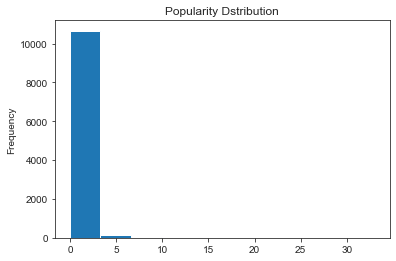

In [332]:
df['popularity'].plot(kind='hist')
plt.title('Popularity Dstribution')


The above plot shows that the distibution of popularity Not evenly distributed and there are outliers Which makes it inappropriate to measure popularity of the movie

Text(0.5, 1.0, ' Vote Average Distribution')

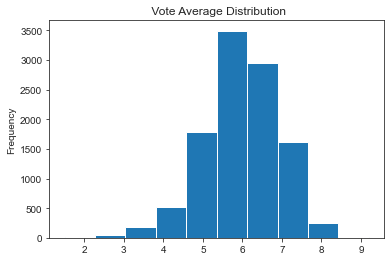

In [333]:
df['vote_average'].plot(kind='hist')
plt.title(' Vote Average Distribution')

The above plot shows that the vote_average is  evenly distributed and there are no  outliers Which makes it appropriate to measure popularity of the movie

Text(0.5, 1.0, 'Revenue Dstribution')

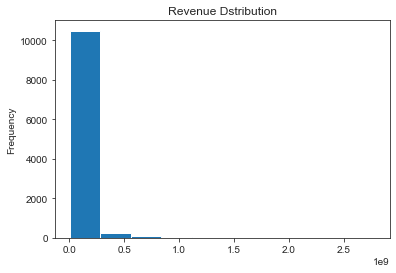

In [334]:
df['revenue'].plot(kind='hist')
plt.title('Revenue Dstribution')


The above plot shows that the distibution of revenue Not evenly distributed and there are outliers Which makes it inappropriate to measure Financial success of the movie

Text(0.5, 1.0, 'Profit Margin Dstribution')

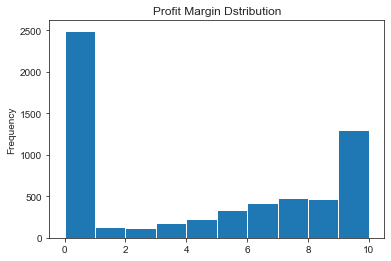

In [335]:
df['profit margin'].plot(kind='hist')
plt.title('Profit Margin Dstribution')


The above plot shows that the profit margin is  evenly distributed and there are no outliers Which makes it appropriate to measure  Financial success of the movie

It was shown that the revenue distribution has right skewed while profit margin is seems somewhat resonable without outliers it leads us to use profit margin instead of revenue in our analysis.
Answer question one :is to use Vote Average and Profit margin as our criterias

In the follwing Section i will define some functions that can answer many questions only by changing the variables of the function 

In [336]:

def topten(independ,depend1,depend2,dfv):
    listn=[]
    list1=[]
    list2=[]

    for idx,name in enumerate(dfv[independ].value_counts()[0:9].index.tolist()):
         dfp1=dfv.loc[dfv[independ]==name,[depend1,depend2]]
         dfp1.head()
         
         
         mean1=  dfp1[depend1].mean()
         mean2= dfp1[depend2].mean()
         
         listn.append(name)
         list1.append(mean1)
         list2.append( mean2)
         
         
    
    return list1,list2,listn

def plot1():
    
    
    list1,list2,listn= topten(independ,depend1,depend2,dfv)
    
    names = listn
    values = list1
    
    fig, ax = plt.subplots(figsize=(16,7))
    fig.tight_layout(pad=2)

    plt.subplot(1,2,2)
    sns.set_style('ticks')
    ax = sns.barplot(x=names, y=values)

    plt.title(title, fontsize=15)
    plt.xlabel(xlabel,fontsize=15)
    plt.xticks(fontsize=12, rotation=90)
    plt.ylabel(ylabel1, fontsize=15)
    plt.yticks(fontsize=15)
    sns.despine(bottom=True)
    ax.grid(False)
    ax.tick_params(bottom=False, left=True)
    for _,s in ax.spines.items():
        s.set_color('black')
        plt.show()
    return

        
def plot2():
    list1,list2,listn= topten(independ,depend1,depend2,dfv)
    x = listn
    y = list1
    z = list2
  
    X_axis = np.arange(len(x))
    fig, ax = plt.subplots(figsize=(10,7))
    fig.tight_layout(pad=2)

  
    plt.bar(X_axis - 0.2, y, 0.4, label = labely)
    plt.bar(X_axis + 0.2, z, 0.4, label = labelz)
  
    plt.xticks(X_axis,x,fontsize=12, rotation=90)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.title(title,fontsize=17)
    plt.legend()
    plt.show()
    return
    

    
    
    
    

Research Question Two : Display the Effect  of Topten movie stars on both profit margin and vote average (which is more affected by the choice of Topten Movie Stars?)

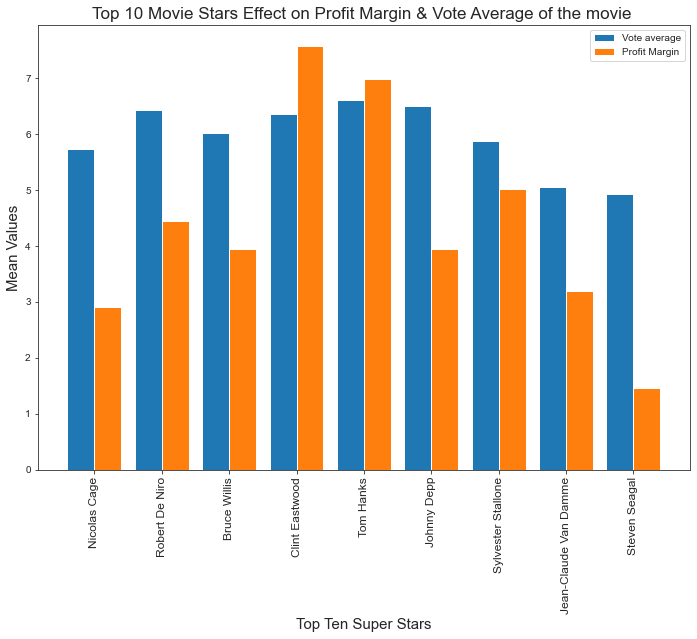

In [337]:
dfv=df
independ='cast0'
depend2='profit margin'
depend1='vote_average'
topten(independ,depend1,depend2,dfv)

xlabel="Top Ten Super Stars"
title ="Top 10 Movie Stars Effect on Profit Margin & Vote Average of the movie "
labelz='Profit Margin'
labely='Vote average'
ylabel='Mean Values'

plot2()


The above bar plots shows that the profit margin is more affected by Actors choise than vote average 

In the follwing section i aim to discuss the effect of genre of the movie on both profit margin and vote average 


Research Question Three: Display the Effect  of Topten movie genres on both profit margin and vote average (which is more affected by the choice  of the genre?

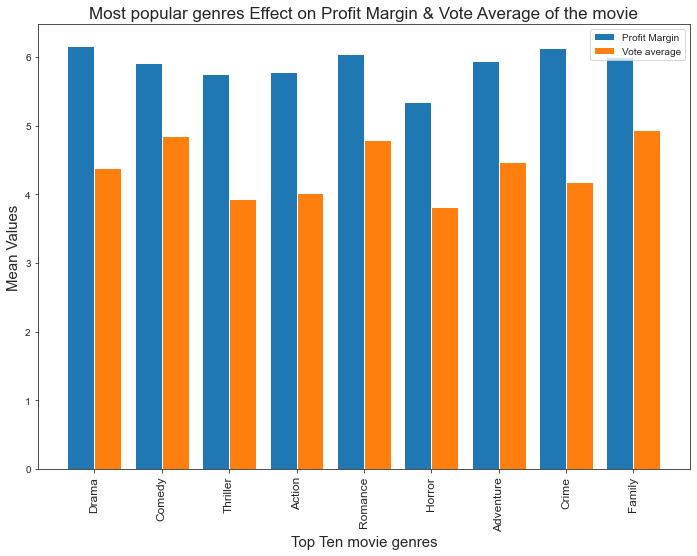

In [338]:
# I melted the 4 genres columns i created before to rows in a new dataframe specialized in genre 

dfg=df[['id','revenue','budget','profit margin','vote_average','popularity','genres0','genres1','genres2','genres3','genres4']]
dfg
dfg=dfg.melt(id_vars=['id','revenue','budget','profit margin','vote_average','popularity'],value_name="genre")

dfv=dfg
independ='genre'
depend2='profit margin'
depend1='vote_average'
xlabel="Top Ten movie genres"

ylabel2="profit Margin"
title ="Most popular genres Effect on Profit Margin & Vote Average of the movie"
labely='Profit Margin'
labelz='Vote average'
ylabel='Mean Values'
topten(independ,depend1,depend2,dfv)
plot2()



The above bar plots shows that the profit margin and vote average affected by the genre of the movie approximatly the same

In the follwing section i aim to discuss some relationships between vote average and each of budget and profit margin
using scatter plot 

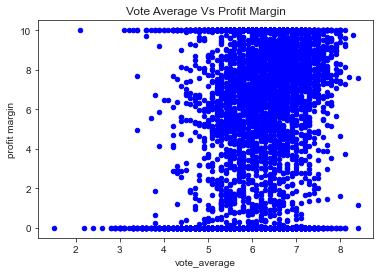

In [339]:
df.plot(x='vote_average',y='profit margin',kind='scatter', color = 'blue')
plt.title('Vote Average Vs Profit Margin')
plt.show()

The above scatter plots shows the positive relation between vote average and profit margin 
it means that the high voting leads to high profit 

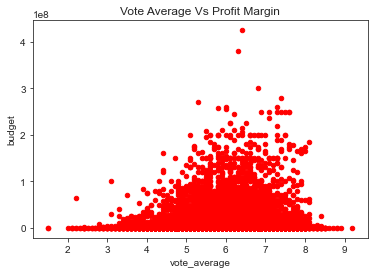

In [340]:
df.plot(x='vote_average',y='budget',kind='scatter', color = 'red')
plt.title('Vote Average Vs Profit Margin')
plt.show()


The above scatter plots shows the positive relation between vote average and budget
it means that the high budget leads to high popularity(voting)

# <a id='conclusions'></a>
## Conclusions

*This dataset which discuss the informations about movies from year 1960 to 2015 , it was very important  regarding the variance of data analysis according to years variance that what leads me to creat a period column which divide the years into 5 equal periods .
*It was necessary to create a column containing the profit margin to avoid the disparity in revenues over the years
*There are many variables to discuss its effect on movies success in this dataset 
but it should be very easy when using the functions I created with changing the input variables of the functions
 I used the graphs to display the results of my analysis statistics
as much as possible
limitations:
*This dataset lacks a lot of information that helps in evaluating movies, 
such as how long the movie was remained in theaters
Detailed data on actors such as wages and popularity
*The datatypes of some columns are inappropriate Such as release_year, release_date,revenue and budget
*The data set have more than one column have the same criteria in measuring data such as (popularity,vote average  release date,release year which is undeveloped

 
